project: https://github.com/clarkfitzg/sta141c-winter19/blob/master/project/project.md

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# difference between agg and agg_awards:
# agg: sum of total_obligation
# agg_awards: annual spending from awards table (more accurate)

agg = pd.read_csv("agg.csv")
agg_awards = pd.read_csv("agg_awards.csv")

# get rid of entries without fiscal year
agg_awards = agg_awards[agg_awards["fiscal_year"] > 0]

agg_awards

,fiscal_year,awarding_agency_id,funding_agency_id,annual_spending
1445,1900.0,760.0,NaN,-1.130235e+08
1446,1973.0,930.0,NaN,9.180900e+04
1447,1992.0,1188.0,1188.0,4.580000e+05
1448,1993.0,1188.0,1188.0,3.920000e+05
1449,1994.0,1188.0,1188.0,4.610000e+05
1450,1995.0,1188.0,1188.0,4.060000e+05
1451,1996.0,48.0,48.0,3.080000e+05
1452,1996.0,1174.0,1174.0,3.000000e+04
1453,1996.0,1188.0,1188.0,9.400000e+04
1454,1997.0,633.0,633.0,1.750000e+05


In [11]:
# created parties.xlsx based on https://en.wikipedia.org/wiki/Party_divisions_of_United_States_Congresses

parties = pd.read_excel("parties.xlsx")
parties.columns.values[[0]] = "fiscal_year"
parties

,fiscal_year,house,senate,president
0,2000,R,R,D
1,2001,R,R,R
2,2002,R,R,R
3,2003,R,R,R
4,2004,R,R,R
5,2005,R,R,R
6,2006,R,R,R
7,2007,D,D,R
8,2008,D,D,R
9,2009,D,D,D


In [16]:
# combine party data and award data
data = pd.merge(agg_awards, parties, on = "fiscal_year")
data

,fiscal_year,awarding_agency_id,funding_agency_id,annual_spending,house,senate,president
0,2000.0,48.0,48.0,1.227600e+07,R,R,D
1,2000.0,67.0,NaN,2.281240e+05,R,R,D
2,2000.0,89.0,89.0,6.352000e+06,R,R,D
3,2000.0,90.0,90.0,3.811000e+06,R,R,D
4,2000.0,99.0,99.0,8.140000e+05,R,R,D
5,2000.0,100.0,100.0,4.354970e+05,R,R,D
6,2000.0,104.0,104.0,7.267100e+07,R,R,D
7,2000.0,105.0,105.0,1.217500e+07,R,R,D
8,2000.0,106.0,106.0,1.767849e+09,R,R,D
9,2000.0,110.0,95.0,2.230000e+05,R,R,D


In [32]:
yearly_spending = data.groupby("fiscal_year").aggregate({"annual_spending" : "sum"})
yearly_spending = yearly_spending.reset_index()
yearly_spending

,fiscal_year,annual_spending
0,2000.0,7.837124e+10
1,2001.0,8.945262e+10
2,2002.0,1.280627e+11
3,2003.0,1.788192e+11
4,2004.0,1.595543e+11
5,2005.0,1.981982e+11
6,2006.0,2.068323e+11
7,2007.0,9.786393e+11
8,2008.0,1.377017e+12
9,2009.0,2.605274e+12


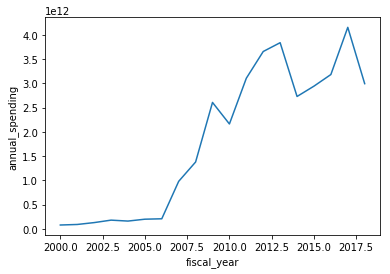

In [33]:
ax = sns.lineplot("fiscal_year", "annual_spending", data = yearly_spending)